In [1]:
import fiftyone as fo
import fiftyone.brain as fob
import fiftyone.zoo as foz
import fiftyone.utils.ultralytics as fou
from ultralytics import YOLO

In [3]:
import numpy as np
from PIL import Image
import os
from pathlib import Path


BASE_DIR = Path(os.path.abspath('')).resolve(strict=True)
BASE_DIR

WindowsPath('C:/Users/ahuss/Documents/ML Projects/Voxel51-Hackthon')

In [ ]:
# initialize dataset
dataset = fo.Dataset()

DATASET_PATH = BASE_DIR / "data" / "NPD" / "NPD"

TRAIN_IMG_DIR = DATASET_PATH / "train"  
TRAIN_ANNOTATION_DIR = DATASET_PATH / "annotations" / "instances_train.json"

# load in dataset
dataset = fo.Dataset.from_dir(
    dataset_type=fo.types.COCODetectionDataset,
    data_path=str(TRAIN_IMG_DIR),
    labels_path=str(TRAIN_ANNOTATION_DIR),
    persistent=True
)

 100% |███████████████| 7801/7801 [31.1s elapsed, 0s remaining, 262.1 samples/s]      



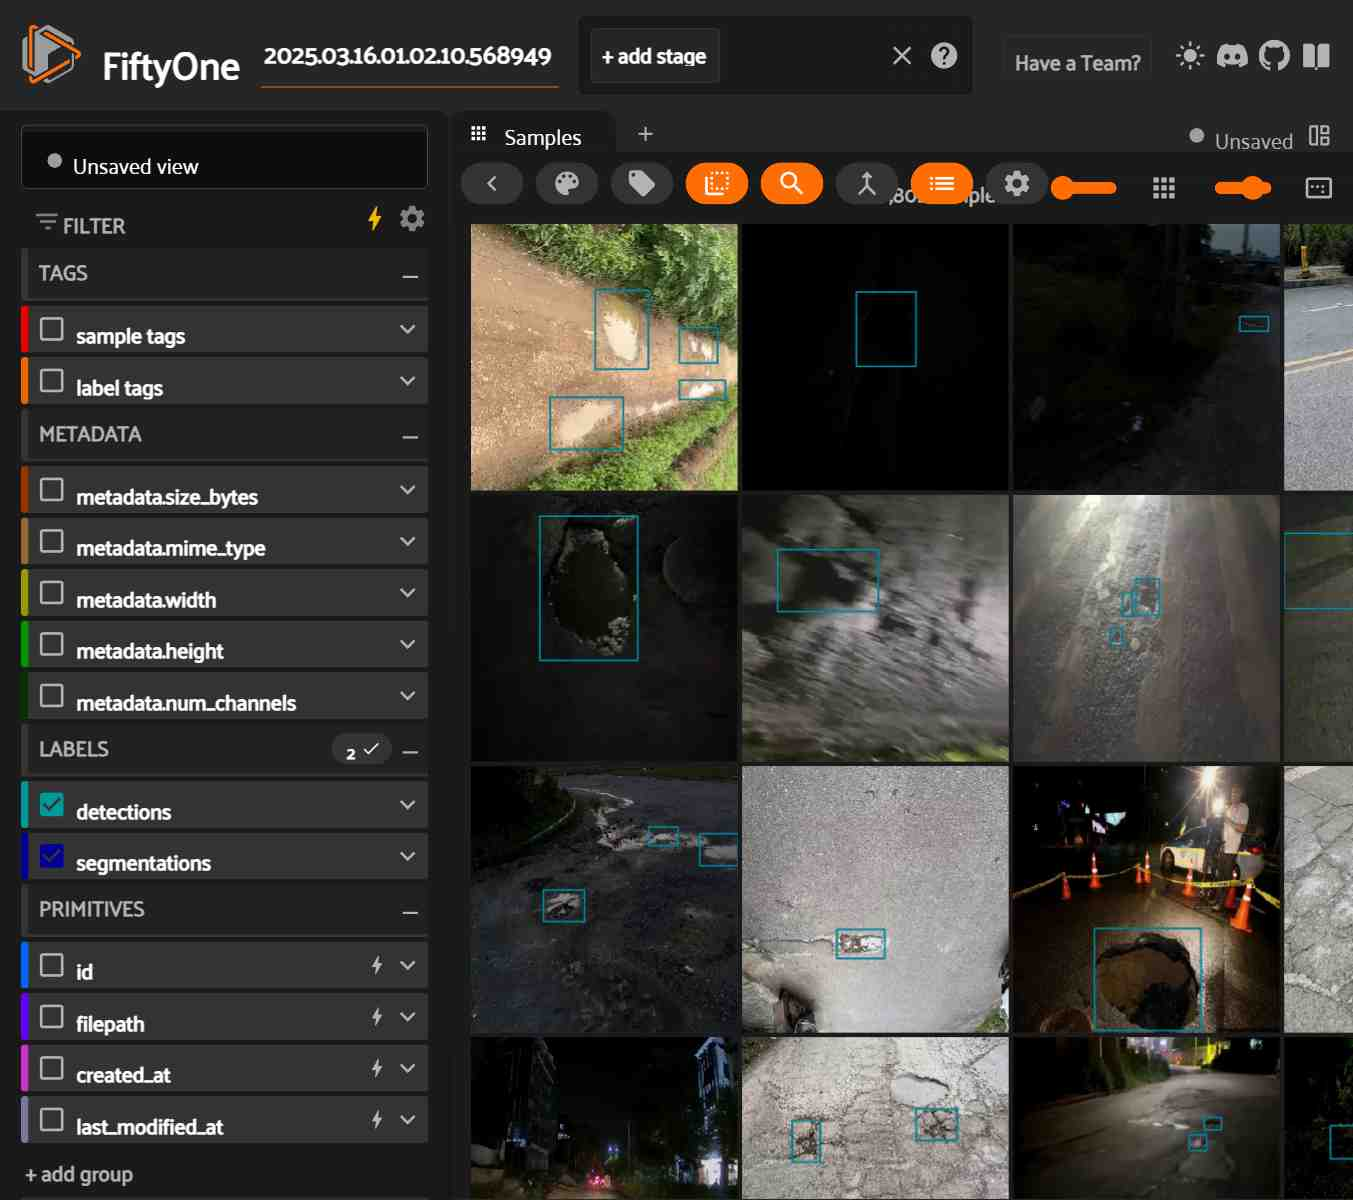

In [6]:
# view the dataset
session = fo.launch_app(dataset)

 100% |███████████████| 7801/7801 [4.0m elapsed, 0s remaining, 67.1 samples/s]      
Generating visualization...


c:\Users\ahuss\anaconda3\envs\myenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\ahuss\anaconda3\envs\myenv\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\ahuss\anaconda3\envs\myenv\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


UMAP(n_jobs=1, random_state=51, verbose=True)
Sun Mar 16 01:16:30 2025 Construct fuzzy simplicial set
Sun Mar 16 01:16:30 2025 Finding Nearest Neighbors
Sun Mar 16 01:16:30 2025 Building RP forest with 9 trees
Sun Mar 16 01:16:36 2025 NN descent for 13 iterations
	 1  /  13
	 2  /  13
	 3  /  13
	 4  /  13
	Stopping threshold met -- exiting after 4 iterations
Sun Mar 16 01:16:47 2025 Finished Nearest Neighbor Search
Sun Mar 16 01:16:49 2025 Construct embedding


Epochs completed:   2%| ▏          11/500 [00:00]

	completed  0  /  500 epochs


Epochs completed:  13%| █▎         66/500 [00:01]

	completed  50  /  500 epochs


Epochs completed:  23%| ██▎        114/500 [00:02]

	completed  100  /  500 epochs


Epochs completed:  32%| ███▏       161/500 [00:02]

	completed  150  /  500 epochs


Epochs completed:  42%| ████▏      209/500 [00:03]

	completed  200  /  500 epochs


Epochs completed:  53%| █████▎     265/500 [00:04]

	completed  250  /  500 epochs


Epochs completed:  63%| ██████▎    315/500 [00:04]

	completed  300  /  500 epochs


Epochs completed:  74%| ███████▍   371/500 [00:05]

	completed  350  /  500 epochs


Epochs completed:  82%| ████████▏  411/500 [00:06]

	completed  400  /  500 epochs


Epochs completed:  93%| █████████▎ 466/500 [00:07]

	completed  450  /  500 epochs


Epochs completed: 100%| ██████████ 500/500 [00:07]


Sun Mar 16 01:16:57 2025 Finished embedding



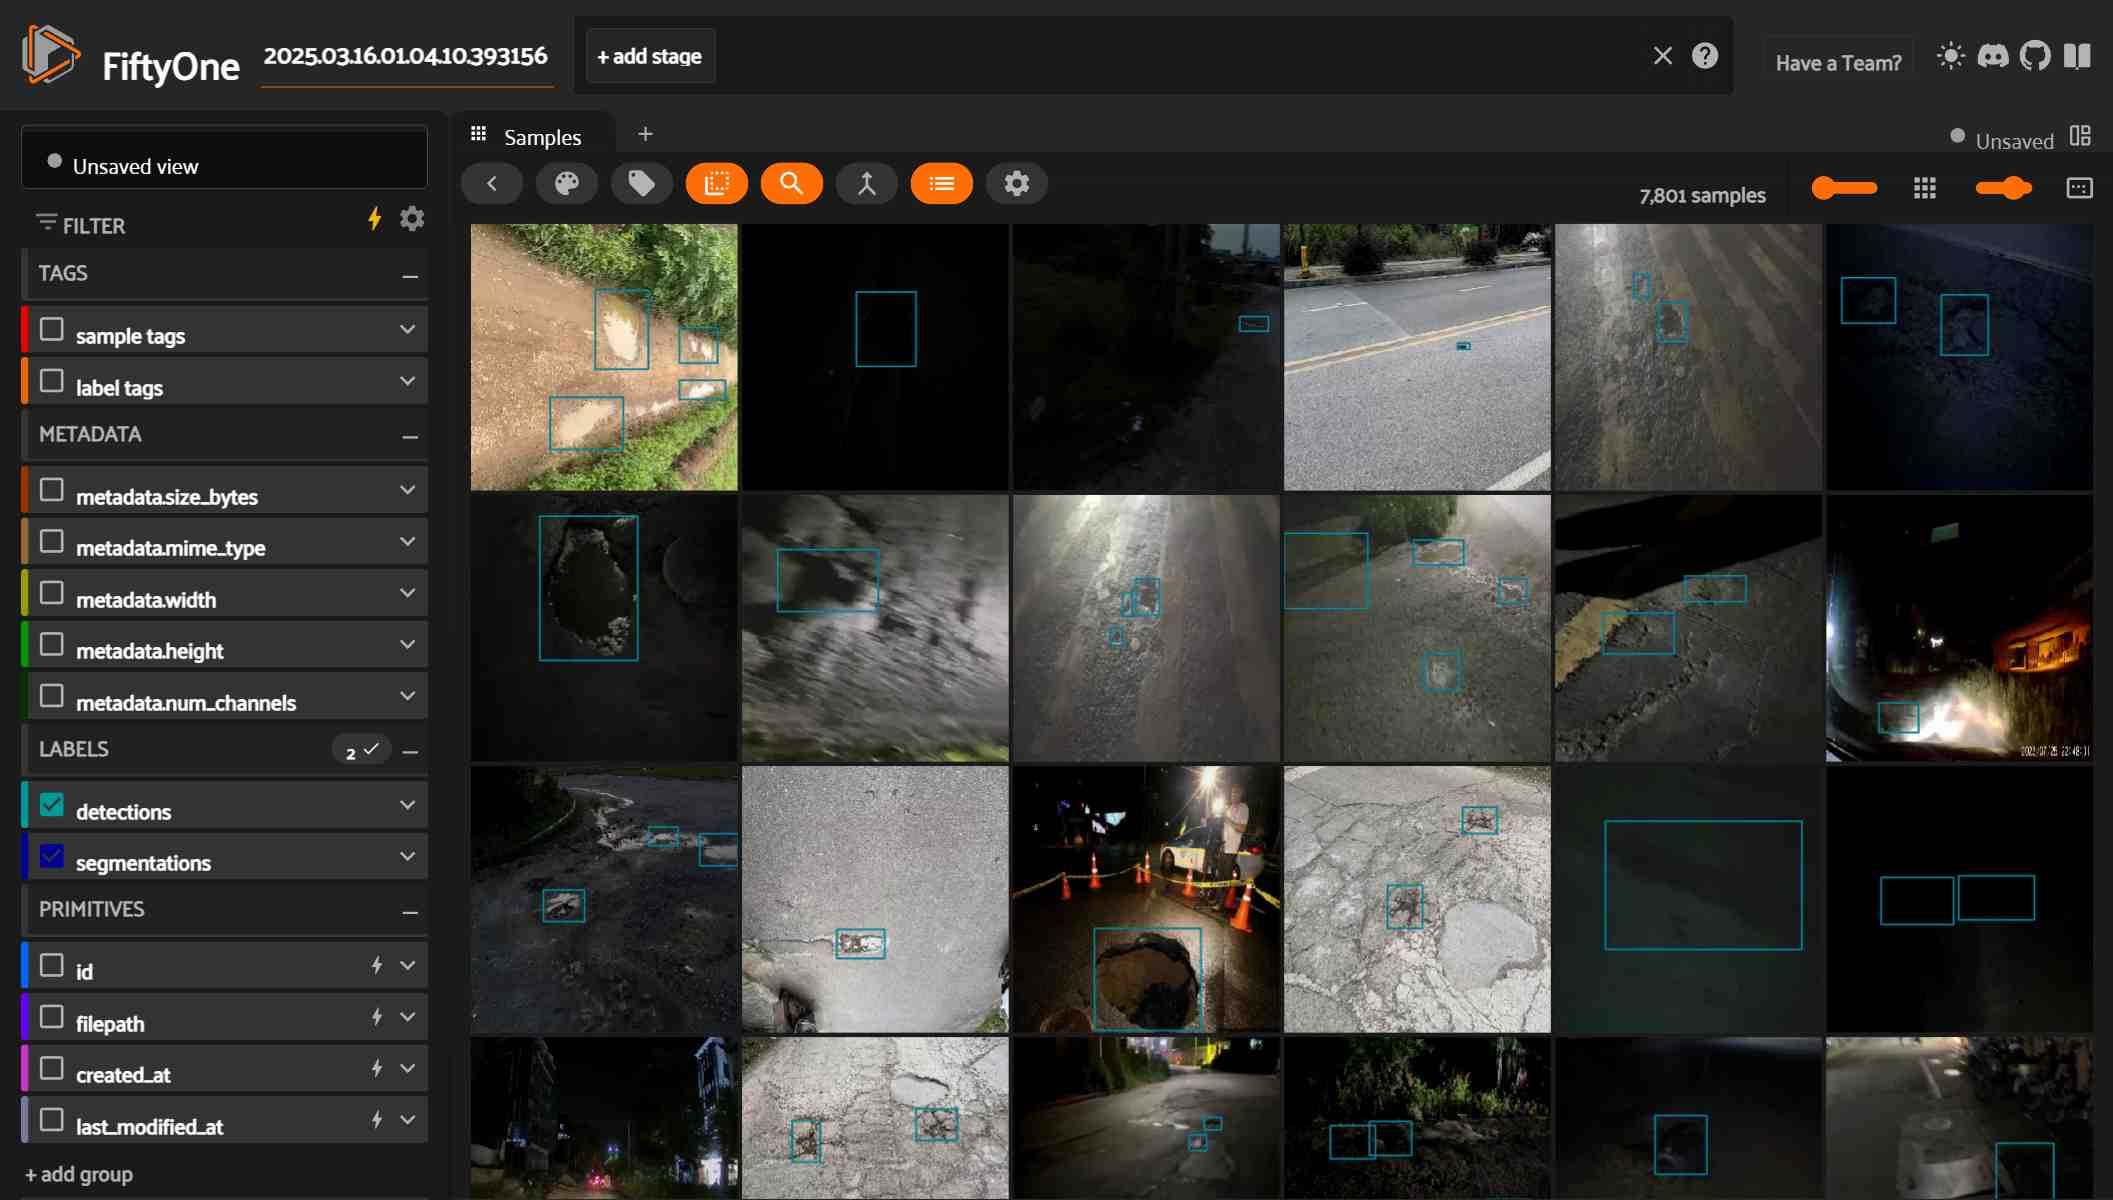

In [ ]:
model = foz.load_zoo_model("mobilenet-v2-imagenet-torch")
embeddings = dataset.compute_embeddings(model)

results = fob.compute_visualization(
    dataset, embeddings=embeddings, seed=51, brain_key="img_viz"
)

session = fo.launch_app(dataset)

In [ ]:
view = dataset.match_tags(['car-1', 'car-2', 'car-3', 'car-4', 'norm-dark-1', 'norm-dark-2', 'norm-dark-3', 'dark-main'])

In [18]:
type(view)

fiftyone.core.view.DatasetView

In [ ]:
# exporting cleaned dataset
EXPORT_PATH = BASE_DIR / "data" /"NPD"

EXPORT_DIR = EXPORT_PATH / "NPD-filtered"

label_field = "detections"

view.export(
    export_dir=str(EXPORT_DIR),
    dataset_type=fo.types.COCODetectionDataset,
    label_field=label_field,
    export_media=True
)

 100% |███████████████| 6023/6023 [48.3s elapsed, 0s remaining, 134.5 samples/s]      


In [12]:
# load filtered dataset back in
dataset = fo.Dataset()

DATASET_PATH = BASE_DIR / "data" / "NPD" / "NPD-filtered"

TRAIN_IMG_DIR = DATASET_PATH / "data"
TRAIN_ANNOTATION_DIR = DATASET_PATH / "labels.json"

label_field = "detections"

dataset = fo.Dataset.from_dir(
    dataset_type=fo.types.COCODetectionDataset,
    data_path=str(TRAIN_IMG_DIR),
    labels_path=str(TRAIN_ANNOTATION_DIR),
    split='train',
    max_samples=5000,
)

Ignoring unsupported parameter 'split' for importer type <class 'fiftyone.utils.coco.COCODetectionDatasetImporter'>
 100% |███████████████| 5000/5000 [10.6s elapsed, 0s remaining, 540.0 samples/s]      


In [13]:
dataset

Name:        2025.03.16.01.18.11.739006
Media type:  image
Num samples: 5000
Persistent:  False
Tags:        []
Sample fields:
    id:               fiftyone.core.fields.ObjectIdField
    filepath:         fiftyone.core.fields.StringField
    tags:             fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:         fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    created_at:       fiftyone.core.fields.DateTimeField
    last_modified_at: fiftyone.core.fields.DateTimeField
    detections:       fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    segmentations:    fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)

In [14]:
classes = dataset.default_classes
classes

['pothole']

In [15]:
validation = fo.Dataset.from_dir(
    dataset_type=fo.types.COCODetectionDataset,
    data_path=str(TRAIN_IMG_DIR),
    labels_path=str(TRAIN_ANNOTATION_DIR),
    split='validation',
    max_samples=750,
)

Ignoring unsupported parameter 'split' for importer type <class 'fiftyone.utils.coco.COCODetectionDatasetImporter'>
 100% |█████████████████| 750/750 [1.5s elapsed, 0s remaining, 488.9 samples/s]         


In [16]:
EXPORT_DIR = BASE_DIR / "images"

dataset.export(
    export_dir=str(EXPORT_DIR),
    dataset_type=fo.types.YOLOv5Dataset,
    label_field=label_field,
    split="train",
    classes=classes,
)

validation.export(
    export_dir=str(EXPORT_DIR),
    dataset_type=fo.types.YOLOv5Dataset,
    label_field=label_field,
    split="val",
    classes=classes,
)

 100% |███████████████| 5000/5000 [14.3s elapsed, 0s remaining, 369.2 samples/s]      
Directory 'C:\Users\ahuss\Documents\ML Projects\Voxel51-Hackthon\images' already exists; export will be merged with existing files
 100% |█████████████████| 750/750 [1.7s elapsed, 0s remaining, 430.0 samples/s]         


In [17]:

YAML_FILE = EXPORT_DIR / "dataset.yaml"

model = YOLO("yolo11m.pt")

model.train(data=YAML_FILE, epochs=5, imgsz=320, batch=12, project="model_out")

Ultralytics 8.3.91  Python-3.12.3 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
engine\trainer: task=detect, mode=train, model=yolo11m.pt, data=C:\Users\ahuss\Documents\ML Projects\Voxel51-Hackthon\images\dataset.yaml, epochs=5, time=None, patience=100, batch=12, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=model_out, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, sav

100%|██████████| 755k/755k [00:00<00:00, 9.23MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  1   1642496  ultralytics.nn.modules.block.C3k2            [1024, 512, 1, True]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  1    542720  ultralytics.nn.modules.block.C3k2            [1024, 256, 1, True]          
 17                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
 18            [-1, 13]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 19                  -1  1   1511424  ultralytics.nn.modules.block.C3k2            [768, 512, 1, True]           
 20                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512,

train: Scanning C:\Users\ahuss\Documents\ML Projects\Voxel51-Hackthon\images\labels\train... 5000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5000/5000 [00:08<00:00, 591.98it/s]


train: New cache created: C:\Users\ahuss\Documents\ML Projects\Voxel51-Hackthon\images\labels\train.cache


val: Scanning C:\Users\ahuss\Documents\ML Projects\Voxel51-Hackthon\images\labels\val... 750 images, 0 backgrounds, 0 corrupt: 100%|██████████| 750/750 [00:01<00:00, 727.30it/s]

val: New cache created: C:\Users\ahuss\Documents\ML Projects\Voxel51-Hackthon\images\labels\val.cache


Plotting labels to model_out\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 106 weight(decay=0.0), 113 weight(decay=0.00046875), 112 bias(decay=0.0)
Image sizes 320 train, 320 val
Using 8 dataloader workers
Logging results to model_out\train2
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      1.86G       2.19      2.287      1.902         22        320: 100%|██████████| 417/417 [01:05<00:00,  6.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.75it/s]


                   all        750       1431     0.0648      0.169     0.0322     0.0106

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      2.33G      2.187      2.156      1.891         13        320: 100%|██████████| 417/417 [00:59<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.45it/s]

                   all        750       1431      0.452      0.331      0.327      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      2.42G      2.073       1.99      1.809         16        320: 100%|██████████| 417/417 [00:56<00:00,  7.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:04<00:00,  6.47it/s]

                   all        750       1431      0.403      0.348      0.316      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      2.49G      1.972      1.804      1.732         29        320: 100%|██████████| 417/417 [00:56<00:00,  7.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.38it/s]

                   all        750       1431      0.514       0.45      0.465      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5      2.62G      1.853      1.636      1.654         24        320: 100%|██████████| 417/417 [00:59<00:00,  7.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  6.11it/s]

                   all        750       1431      0.687      0.526      0.609      0.305



5 epochs completed in 0.091 hours.
Optimizer stripped from model_out\train2\weights\last.pt, 40.5MB
Optimizer stripped from model_out\train2\weights\best.pt, 40.5MB

Validating model_out\train2\weights\best.pt...
Ultralytics 8.3.91  Python-3.12.3 torch-2.6.0+cu126 CUDA:0 (NVIDIA GeForce RTX 4060 Laptop GPU, 8188MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:05<00:00,  5.79it/s]


                   all        750       1431      0.687      0.527       0.61      0.305
Speed: 0.1ms preprocess, 2.4ms inference, 0.0ms loss, 1.3ms postprocess per image
Results saved to model_out\train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x00000271192C0B60>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [ ]:
# run inference on validation dataset
MODEL_DIR = BASE_DIR / "model_out" / "train2" / "weights" / "best.pt"

ft_model = YOLO(str(MODEL_DIR))

validation.apply_model(ft_model, label_field="ft_predict")

results = validation.evaluate_detections(
    "ft_predict",
    gt_field="detections",
    eval_key="eval"
)

session = fo.launch_app(validation)

 100% |█████████████████| 750/750 [19.6s elapsed, 0s remaining, 39.3 samples/s]      
Evaluating detections...
 100% |█████████████████| 750/750 [1.8s elapsed, 0s remaining, 411.4 samples/s]         
